In [1]:
%matplotlib widget
from main import *
import matplotlib.pyplot as plt
import sympy as sp
from sympy import Heaviside, sin, cos
sp.init_printing()

In [2]:
Vcc = 5

Vin = 5 * sin(t)

In [3]:
acTest = Solver.Circuit("acTest")
acTest.element(
                    VoltageSource("Vg1", {"V+" : "V1", "V-" : Gnd}, V_t = Vin),
                    VoltageSource("Vg2", {"V+" : Gnd, "V-" : "V2"}, V_t = Vin),
                    
                    Diode("D1", {"Vp" : "V1", "Vn" : "V3"}),
                    Diode("D2", {"Vp" : "V2", "Vn" : "V3"}),
                    
                    Resistor("R1", {"V1" : "V3", "V2" : "Vc"}, R = 1),
                    
                    CurrentSource("Iout", {"V+" : "Vc", "V-" : Gnd}, I_t = -1e-3),
                    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, V0 = 3.5, C = 5e-3),
)

{'Vg1': {'name': 'Vg1', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*sin(t)}},
 'Vg2': {'name': 'Vg2', 'type': 'VoltageSource', 'nodes': {'V+': 0, 'V-': 'V2'}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*sin(t)}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}},
 'D2': {'name': 'D2', 'type': 'Diode', 'nodes': {'Vp': 'V2', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V3', 'V2': 'Vc'}, 'values': {'R': 1}},
 'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vc', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': -0.001}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 0.005, 'V0': 3.5}}}

In [4]:
Solver.setMain("acTest")

{'elements': {'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 0.005, 'V0': 3.5}},
              'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}},
              'D2': {'name': 'D2', 'type': 'Diode', 'nodes': {'Vp': 'V2', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}},
              'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vc', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': -0.001}},
              'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V3', 'V2': 'Vc'}, 'values': {'R': 1}},
              'Vg1': {'name': 'Vg1', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*sin(t)}},
              'Vg2': {'name': 'Vg2', 'type': 'VoltageSource', 'nodes': {'V+': 0, 'V-': 'V2'}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*sin(t)}}},
 'nodes': {'V1', 'V3', 'Vc', 'V2'}}

In [5]:
"""
try: 
    compiled = loadCompiled("acTest")
except (OSError, IOError) as e:
    compiled = Solver.compile()
    saveCompiled("acTest", compiled)
"""
    
compiled = loadCompiled("acTest")

In [6]:
print(compiled["nodes"])

Vin = compiled["voltages"]["Vg1"]["V+"]
Id1 = compiled["currents"]["D1"]["Vp"]
Id2 = compiled["currents"]["D2"]["Vp"]
Id = compiled["currents"]["R1"]["V1"]
Vd = compiled["voltages"]["D1"]["Vp"] - compiled["voltages"]["D1"]["Vn"]
Vc = compiled["nodes"]["Vc"]
Iout = compiled["currents"]["Iout"]["V+"]

print(Vin)
print(Vc)
print(Iout)
print(Id)

{'V2': V0, 'Vc': V1, 'V1': V2, 'V3': V3}
V2
V1
I5_0
I4_0


In [7]:
"""
try: 
    model = loadModel("acTest", "Laplace")
except (OSError, IOError) as e:
    model = solveLaplace(compiled, 3 * sp.pi, tstep = 0.1, measurments = {Vin, Vc, Iout, Id}, debugLog = 1)
    saveModel("acTest", "Laplace", model)
"""
    
model = solveLaplace(compiled, 3 * sp.pi, tstep = 0.1, measurments = {Vin, Vc, Iout, Id}, debugLog = 1)

{V0, I6_0, I5_1, I3_0, I1_0, V2, I6_1, I5_0, I0_1, I4_0, I2_1, I0_0, I3_1, V3, I4_1, I1_1, I2_0, V1}
{I4_0, I5_0, V2, V1}
[Eq(I1_1 + I3_0, 0), Eq(I4_1 + I5_0 + I6_0, 0), Eq(I0_0 + I2_0, 0), Eq(I2_1 + I3_1 + I4_0, 0)]
{'Vg1': {'name': 'Vg1', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*sin(t)}}, 'Vg2': {'name': 'Vg2', 'type': 'VoltageSource', 'nodes': {'V+': 0, 'V-': 'V2'}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*sin(t)}}, 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}}, 'D2': {'name': 'D2', 'type': 'Diode', 'nodes': {'Vp': 'V2', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}}, 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V3', 'V2': 'Vc'}, 'values': {'R': 1}}, 'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vc', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': -0.001}}, 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values

11it [00:04,  2.37it/s]                      


{('D1', 'Cut'): [V2 - V3 <= 0.6], ('D2', 'Cut'): [V0 - V3 <= 0.6]}
{('D1', 'Cut'): [True], ('D2', 'Cut'): [True]}
*****************************************
0.9999999999999999 							
Changed state:  {('D1', 'Cut')}
0.9010192871093748 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
{('Vg1', ''), ('Iout', ''), ('D2', 'Cut'), ('C1', ''), ('R1', ''), ('D1', 'Fwd'), ('Vg2', '')}
[Eq(V2, (3.9198005081413*s + 3.10405605238939)/(s**2 + 1)), Eq(I0_0 + I0_1, 0), Eq(-V0, (3.9198005081413*s + 3.10405605238939)/(s**2 + 1)), Eq(I1_0 + I1_1, 0), Eq(V2 - V3, 0.6/s), Eq(I2_0 + I2_1, 0), Eq(I3_0, 0), Eq(I3_1, 0), Eq(I4_0, -V1 + V3), Eq(I4_0 + I4_1, 0), Eq(I5_1, -0.001/s), Eq(I5_0 + I5_1, 0), Eq(I6_0, 0.005*V1*s - 0.0165989807128906), Eq(I6_0 + I6_1, 0), Eq(I1_1 + I3_0, 0), Eq(I4_1 + I5_0 + I6_0, 0), Eq(I0_0 + I2_0, 0), Eq(I2_1 + I3_1 + I4_0, 0)]
{('D1', 'Fwd'): [I2_0 > 0], ('D2', 'Cut'): [V0 - V3 <= 0.6]}
{I4_0, V0, I2_0, V3, I5_0, V2, V1}
-------------------------------------------------
{I0_0: 

9it [00:29,  3.29s/it]                       


{('D1', 'Fwd'): [I2_0 > 0], ('D2', 'Cut'): [V0 - V3 <= 0.6]}
{('D1', 'Fwd'): [True], ('D2', 'Cut'): [True]}
*****************************************
1.7010192871093754 						
Changed state:  {('D1', 'Fwd')}
1.6158081054687505 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
{('Vg1', ''), ('D1', 'Cut'), ('Iout', ''), ('D2', 'Cut'), ('C1', ''), ('R1', ''), ('Vg2', '')}
[Eq(V2, (4.99493570458546*s - 0.224982903922492)/(s**2 + 1)), Eq(I0_0 + I0_1, 0), Eq(-V0, (4.99493570458546*s - 0.224982903922492)/(s**2 + 1)), Eq(I1_0 + I1_1, 0), Eq(I2_0, 0), Eq(I2_1, 0), Eq(I3_0, 0), Eq(I3_1, 0), Eq(I4_0, -V1 + V3), Eq(I4_0 + I4_1, 0), Eq(I5_1, -0.001/s), Eq(I5_0 + I5_1, 0), Eq(I6_0, 0.005*V1*s - 0.0219746786035602), Eq(I6_0 + I6_1, 0), Eq(I1_1 + I3_0, 0), Eq(I4_1 + I5_0 + I6_0, 0), Eq(I0_0 + I2_0, 0), Eq(I2_1 + I3_1 + I4_0, 0)]
{('D1', 'Cut'): [V2 - V3 <= 0.6], ('D2', 'Cut'): [V0 - V3 <= 0.6]}
{I4_0, V0, V3, I5_0, V2, V1}
-------------------------------------------------
{V2: (1.24873392614637e+

16it [00:09,  1.69it/s]              


{('D1', 'Cut'): [V2 - V3 <= 0.6], ('D2', 'Cut'): [V0 - V3 <= 0.6]}
{('D1', 'Cut'): [True], ('D2', 'Cut'): [True]}
*****************************************
4.315808105468752 							
Changed state:  {('D2', 'Cut')}
4.247192382812502 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
{('Vg1', ''), ('D2', 'Fwd'), ('D1', 'Cut'), ('Iout', ''), ('C1', ''), ('R1', ''), ('Vg2', '')}
[Eq(V2, (-4.46866694749919*s - 2.24299257964182)/(s**2 + 1)), Eq(I0_0 + I0_1, 0), Eq(-V0, (-4.46866694749919*s - 2.24299257964182)/(s**2 + 1)), Eq(I1_0 + I1_1, 0), Eq(I2_0, 0), Eq(I2_1, 0), Eq(V0 - V3, 0.6/s), Eq(I3_0 + I3_1, 0), Eq(I4_0, -V1 + V3), Eq(I4_0 + I4_1, 0), Eq(I5_1, -0.001/s), Eq(I5_0 + I5_1, 0), Eq(I6_0, 0.005*V1*s - 0.0193432943262164), Eq(I6_0 + I6_1, 0), Eq(I1_1 + I3_0, 0), Eq(I4_1 + I5_0 + I6_0, 0), Eq(I0_0 + I2_0, 0), Eq(I2_1 + I3_1 + I4_0, 0)]
{('D1', 'Cut'): [V2 - V3 <= 0.6], ('D2', 'Fwd'): [I3_0 > 0]}
{I4_0, I3_0, V3, I5_0, V2, V1}
-------------------------------------------------
{V2: (-44

8it [00:47,  5.99s/it]                       


{('D1', 'Cut'): [V2 - V3 <= 0.6], ('D2', 'Fwd'): [I3_0 > 0]}
{('D1', 'Cut'): [True], ('D2', 'Fwd'): [True]}
*****************************************
4.8471923828125 								
Changed state:  {('D2', 'Fwd')}
4.7574218749999995 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
{('Vg1', ''), ('D1', 'Cut'), ('Iout', ''), ('D2', 'Cut'), ('C1', ''), ('R1', ''), ('Vg2', '')}
[Eq(V2, (0.225088376642239 - 4.99493095274605*s)/(s**2 + 1)), Eq(I0_0 + I0_1, 0), Eq(-V0, (0.225088376642239 - 4.99493095274605*s)/(s**2 + 1)), Eq(I1_0 + I1_1, 0), Eq(I2_0, 0), Eq(I2_1, 0), Eq(I3_0, 0), Eq(I3_1, 0), Eq(I4_0, -V1 + V3), Eq(I4_0 + I4_1, 0), Eq(I5_1, -0.001/s), Eq(I5_0 + I5_1, 0), Eq(I6_0, 0.005*V1*s - 0.0219746574817093), Eq(I6_0 + I6_1, 0), Eq(I1_1 + I3_0, 0), Eq(I4_1 + I5_0 + I6_0, 0), Eq(I0_0 + I2_0, 0), Eq(I2_1 + I3_1 + I4_0, 0)]
{('D1', 'Cut'): [V2 - V3 <= 0.6], ('D2', 'Cut'): [V0 - V3 <= 0.6]}
{I4_0, V0, V3, I5_0, V2, V1}
-------------------------------------------------
{V2: (225088376642239.0 -

18it [00:08,  2.00it/s]              


{('D1', 'Cut'): [V2 - V3 <= 0.6], ('D2', 'Cut'): [V0 - V3 <= 0.6]}
{('D1', 'Cut'): [True], ('D2', 'Cut'): [True]}
*****************************************
7.45742187499999 								
Changed state:  {('D1', 'Cut')}
7.38879394531249 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
{('Vg1', ''), ('Iout', ''), ('D2', 'Cut'), ('C1', ''), ('R1', ''), ('D1', 'Fwd'), ('Vg2', '')}
[Eq(V2, (4.46868692994132*s + 2.24295276860028)/(s**2 + 1)), Eq(I0_0 + I0_1, 0), Eq(-V0, (4.46868692994132*s + 2.24295276860028)/(s**2 + 1)), Eq(I1_0 + I1_1, 0), Eq(V2 - V3, 0.6/s), Eq(I2_0 + I2_1, 0), Eq(I3_0, 0), Eq(I3_1, 0), Eq(I4_0, -V1 + V3), Eq(I4_0 + I4_1, 0), Eq(I5_1, -0.001/s), Eq(I5_0 + I5_1, 0), Eq(I6_0, 0.005*V1*s - 0.0193432854113968), Eq(I6_0 + I6_1, 0), Eq(I1_1 + I3_0, 0), Eq(I4_1 + I5_0 + I6_0, 0), Eq(I0_0 + I2_0, 0), Eq(I2_1 + I3_1 + I4_0, 0)]
{('D1', 'Fwd'): [I2_0 > 0], ('D2', 'Cut'): [V0 - V3 <= 0.6]}
{I4_0, V0, I2_0, V3, I5_0, V2, V1}
-------------------------------------------------
{I0_0: (

9it [00:31,  3.46s/it]                       


{('D1', 'Fwd'): [I2_0 > 0], ('D2', 'Cut'): [V0 - V3 <= 0.6]}
{('D1', 'Fwd'): [True], ('D2', 'Cut'): [True]}
*****************************************
7.988793945312488 							
Changed state:  {('D1', 'Fwd')}
7.898992919921862 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
{('Vg1', ''), ('D1', 'Cut'), ('Iout', ''), ('D2', 'Cut'), ('C1', ''), ('R1', ''), ('Vg2', '')}
[Eq(V2, (4.99493581543988*s - 0.224980442785402)/(s**2 + 1)), Eq(I0_0 + I0_1, 0), Eq(-V0, (4.99493581543988*s - 0.224980442785402)/(s**2 + 1)), Eq(I1_0 + I1_1, 0), Eq(I2_0, 0), Eq(I2_1, 0), Eq(I3_0, 0), Eq(I3_1, 0), Eq(I4_0, -V1 + V3), Eq(I4_0 + I4_1, 0), Eq(I5_1, -0.001/s), Eq(I5_0 + I5_1, 0), Eq(I6_0, 0.005*V1*s - 0.0219746790962917), Eq(I6_0 + I6_1, 0), Eq(I1_1 + I3_0, 0), Eq(I4_1 + I5_0 + I6_0, 0), Eq(I0_0 + I2_0, 0), Eq(I2_1 + I3_1 + I4_0, 0)]
{('D1', 'Cut'): [V2 - V3 <= 0.6], ('D2', 'Cut'): [V0 - V3 <= 0.6]}
{I4_0, V0, V3, I5_0, V2, V1}
-------------------------------------------------
{V2: (2.49746790771994e+1

21it [00:08,  2.42it/s]              

{('D1', 'Cut'): [V2 - V3 <= 0.6], ('D2', 'Cut'): [V0 - V3 <= 0.6]}
{('D1', 'Cut'): [True], ('D2', 'Cut'): [True]}
*****************************************
9.498992919921857 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [8]:
printModel(model, var=t)

{('Vg1', ''), ('D1', 'Cut'), ('Iout', ''), ('D2', 'Cut'), ('C1', ''), ('R1', ''), ('Vg2', '')}
t ∈ Interval.Ropen(0, 0.901019287109375)
{I4_0: 0, I5_0: 0.00100000000000000, V2: 5.0*sin(t), V1: 3.5 - 0.2*t}
-------------------------------------
{('Vg1', ''), ('Iout', ''), ('D2', 'Cut'), ('C1', ''), ('R1', ''), ('D1', 'Fwd'), ('Vg2', '')}
t ∈ Interval.Ropen(0.901019287109375, 1.61580810546875)
{I5_0: 0.00100000000000000, I4_0: -0.0195209131165689*sin(t) + 0.0156178848275298*cos(t) + 0.001 - 0.0166135192643497*exp(-200.0*t), V1: 3.12357696550596*sin(t) + 3.90418262331377*cos(t) - 0.601 + 0.0166135192643488*exp(-200.0*t), V2: 3.10405605238939*sin(t) + 3.9198005081413*cos(t)}
-------------------------------------
{('Vg1', ''), ('D1', 'Cut'), ('Iout', ''), ('D2', 'Cut'), ('C1', ''), ('R1', ''), ('Vg2', '')}
t ∈ Interval.Ropen(1.61580810546875, 4.24719238281250)
{I4_0: 0, I5_0: 0.00100000000000000, V2: -0.224982903922492*sin(t) + 4.99493570458546*cos(t), V1: 4.39493572071204 - 0.2*t}
--------

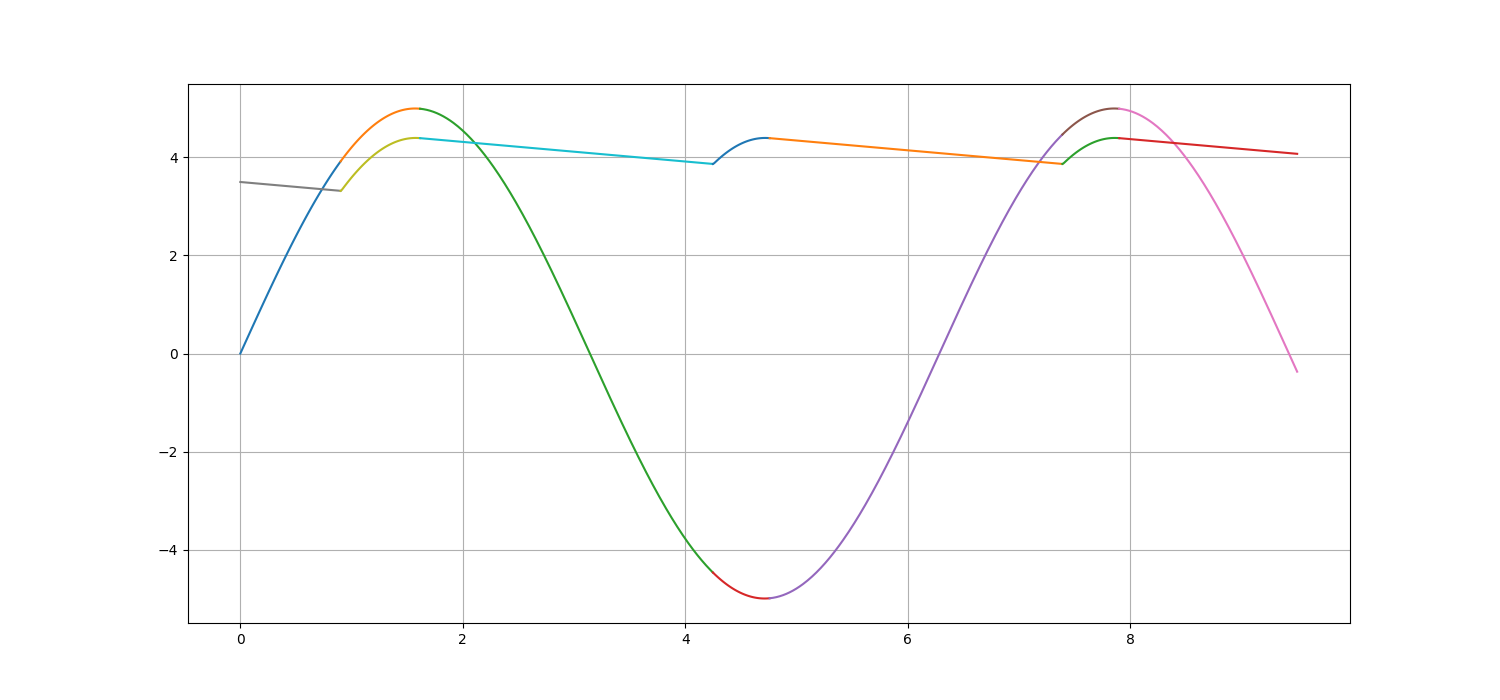

In [9]:
measurments =   [   
                    (t0, Vin, "Vin(t)"),
                    (t0, Vc, "Vc(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()

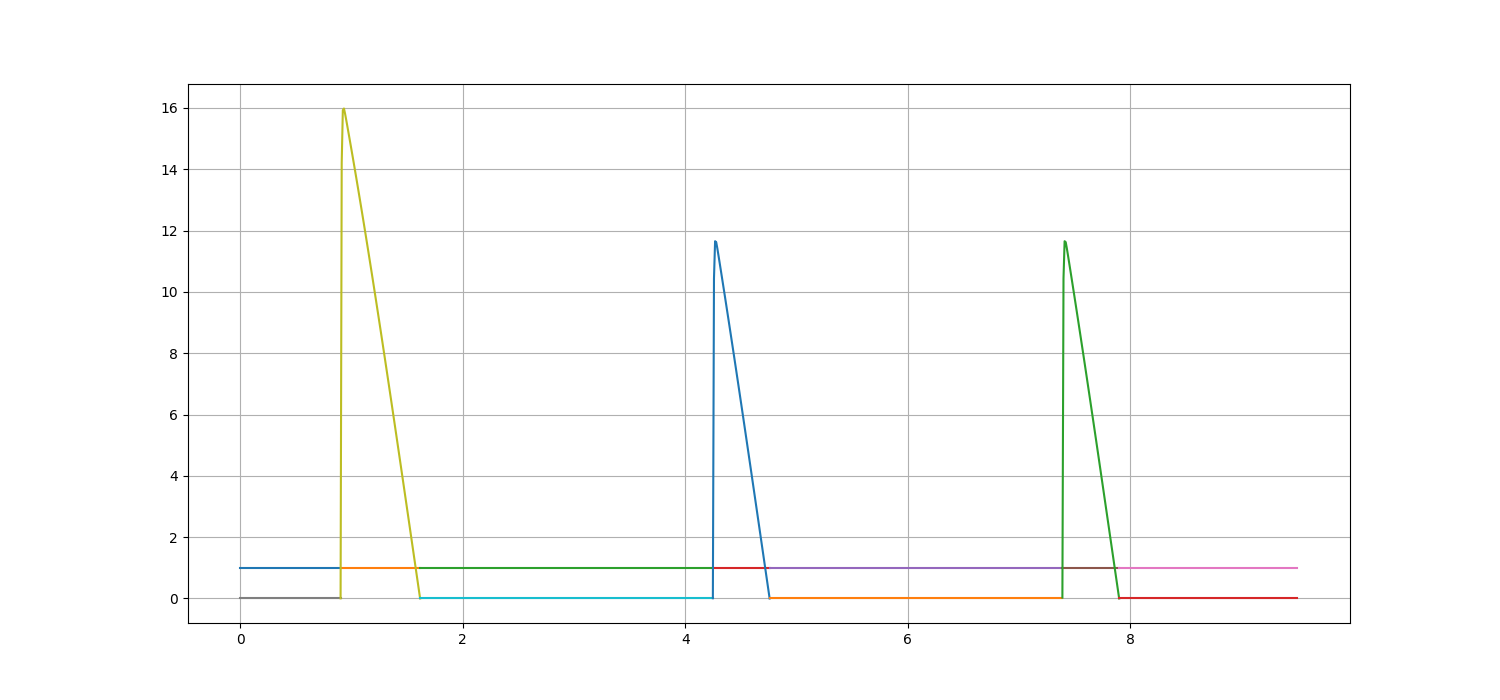

In [10]:
measurments =   [   
                    (t0, 1e3 * Iout, "Iout(t)"),
                    (t0, 1e3 * Id, "Id(t)"),
                    #(Vd, "Vd(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()